<a href="https://colab.research.google.com/github/christianmattar/Advanced-Final-Project/blob/Added-imageToText-conversion/COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Upload Data from google drive

In [1]:
# Upload google drive in our COLAB

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## install transflow verison 2


In [2]:
%tensorflow_version 2.x
import tensorflow as tf


Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


## Importing Libraries


In [3]:
# Importing librar

import tensorflow.keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Activation, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay
import numpy as np


##Create path to Folders

In [4]:


train_loc = '/content/drive/MyDrive/out_DATA/train'
test_loc = '/content/drive/MyDrive/out_DATA/val/'

Resize Images to 224X224

In [5]:
trdata = ImageDataGenerator(rescale= 1./255,
                            shear_range = 0.2,
                            zoom_range = 0.2,
                            horizontal_flip = True,
)


traindata = trdata.flow_from_directory(directory=train_loc,target_size=(224,224))



tsdata = ImageDataGenerator(rescale= 1./255,
                            shear_range = 0.2,
                            zoom_range = 0.2,
                            horizontal_flip = True,
)

testdata = tsdata.flow_from_directory(directory = test_loc, target_size = (224,224))

Found 262 images belonging to 2 classes.
Found 114 images belonging to 2 classes.


In [ ]:
traindata.class_indices

{'COVID+': 0, 'COVID-': 1}

##Create The NetWork


In [ ]:
# define input image
input_shape = (224,224,3)

# create the Network
# Input layer
img_imput = Input(shape  = input_shape, name = 'img_input')

# Convo layers
x = Conv2D(32, (3,3) , padding = 'same' , activation='relu', name = 'layer_1') (img_imput)
x = Conv2D(64, (3,3) , padding = 'same' , activation='relu', name = 'layer_2') (x)
x = MaxPool2D((2,2), strides=(2,2), name = 'layer_3') (x)
x = Dropout(0.25)(x)

x = Conv2D(64, (3,3) , padding = 'same' , activation='relu', name = 'layer_4') (x)
x = MaxPool2D((2,2), strides=(2,2), name = 'layer_5') (x)
x = Dropout(0.25)(x)

x = Conv2D(128, (3,3) , padding = 'same' , activation='relu', name = 'layer_6') (x)
x = MaxPool2D((2,2), strides=(2,2), name = 'layer_7') (x)
x = Dropout(0.25)(x)

x = Flatten(name = 'fc_1')(x)
x= Dense(64, name = 'lyaer_8')(x)
x = Dropout(0.5) (x)
x = Dense(2, activation='sigmoid', name='predictions')(x)



## Generate the model

In [ ]:
model = Model(inputs = img_imput , outputs = x , name = 'CNN_COVID_19')

## pint network Structure

In [ ]:
model.summary()

Model: "CNN_COVID_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img_input (InputLayer)      [(None, 224, 224, 3)]     0         
                                                                 
 layer_1 (Conv2D)            (None, 224, 224, 32)      896       
                                                                 
 layer_2 (Conv2D)            (None, 224, 224, 64)      18496     
                                                                 
 layer_3 (MaxPooling2D)      (None, 112, 112, 64)      0         
                                                                 
 dropout_1 (Dropout)         (None, 112, 112, 64)      0         
                                                                 
 layer_4 (Conv2D)            (None, 112, 112, 64)      36928     
                                                                 
 layer_5 (MaxPooling2D)      (None, 56, 56, 64)       

## Cmpiling the model

In [ ]:
model.compile(optimizer= 'adam' , loss= binary_crossentropy , metrics=['accuracy'])

## Start Train / test


In [ ]:

batch_size = 32
hist = model.fit(traindata, steps_per_epoch = traindata.samples//batch_size,
                 validation_data = testdata,validation_steps = testdata.samples//batch_size,
                 epochs = 10
                 )

Epoch 1/10
8/8 [==============================] - 132s 15s/step - loss: 1.4237 - accuracy: 0.6391 - val_loss: 0.6750 - val_accuracy: 0.8438
Epoch 2/10
8/8 [==============================] - 12s 2s/step - loss: 0.5948 - accuracy: 0.7087 - val_loss: 0.5459 - val_accuracy: 0.8542
Epoch 3/10
8/8 [==============================] - 12s 2s/step - loss: 0.4241 - accuracy: 0.8359 - val_loss: 0.3275 - val_accuracy: 0.8542
Epoch 4/10
8/8 [==============================] - 12s 1s/step - loss: 0.3472 - accuracy: 0.8348 - val_loss: 0.2779 - val_accuracy: 0.9271
Epoch 5/10
8/8 [==============================] - 12s 1s/step - loss: 0.2958 - accuracy: 0.8957 - val_loss: 0.2573 - val_accuracy: 0.8958
Epoch 6/10
8/8 [==============================] - 12s 1s/step - loss: 0.2290 - accuracy: 0.9304 - val_loss: 0.2192 - val_accuracy: 0.9688
Epoch 7/10
8/8 [==============================] - 12s 1s/step - loss: 0.2020 - accuracy: 0.9435 - val_loss: 0.2876 - val_accuracy: 0.8958
Epoch 8/10
8/8 [================

## plot history loss



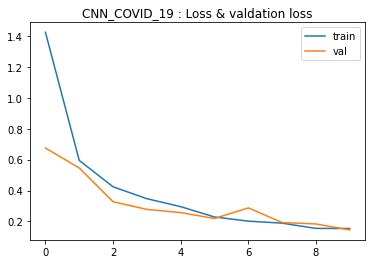

In [ ]:
plt.plot(hist.history['loss'],label = 'train')
plt.plot (hist.history['val_loss'],label = 'val')
plt.title('CNN_COVID_19 : Loss & valdation loss')
plt.legend()
plt.show()

## plot history accuracy

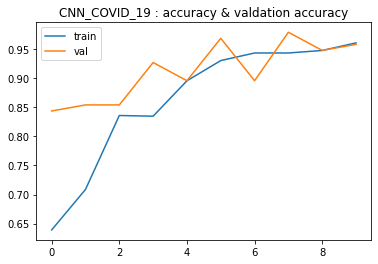

In [ ]:
plt.plot(hist.history['accuracy'],label = 'train')
plt.plot (hist.history['val_accuracy'],label = 'val')
plt.title('CNN_COVID_19 : accuracy & valdation accuracy')
plt.legend()
plt.show()

# Confusion Matrix  & Pres  & Recall   & F1-Score


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  after removing the cwd from sys.path.


Confusion Matrix
[[30 29]
 [31 24]]
classification_Report
              precision    recall  f1-score   support

      COVID+       0.49      0.51      0.50        59
      COVID-       0.45      0.44      0.44        55

    accuracy                           0.47       114
   macro avg       0.47      0.47      0.47       114
weighted avg       0.47      0.47      0.47       114



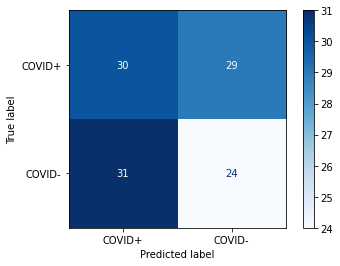

In [ ]:

target_names = ['COVID+', 'COVID-']
label_names = [0,1]

Y_pred = model.predict_generator(testdata)
y_pred = np.argmax(Y_pred ,  axis = 1)

cm = confusion_matrix(testdata.classes, y_pred, labels = label_names)


print('Confusion Matrix')
print(confusion_matrix(testdata.classes, y_pred))

print('classification_Report')
print(classification_report(testdata.classes, y_pred, target_names=target_names))

disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels=target_names)
disp = disp.plot(cmap=plt.cm.Blues, values_format = 'g')
plt.show()
